# Netflix Analysis

In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections


## Loading in the datasets and standardizing them

In [2]:
#load data into DataFrame (https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney)
movie_streaming_df = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
movie_streaming_df['type'] = 'Movie'

#clean unnecessary columns
movie_streaming_df.drop(['Unnamed: 0', 'ID', 'Prime Video', 'Type'], axis = 1, inplace = True)

movie_streaming_df.rename(columns={'type': 'Type'}, inplace = True)

#filter dataframe to just movies on netflix
movie_netflix_filtered_df = movie_streaming_df.loc[(movie_streaming_df['Netflix'] == 1) &
                                                        (movie_streaming_df['Hulu'] == 0) &
                                                        (movie_streaming_df['Disney+'] == 0)]

movie_netflix_filtered_df.reset_index(inplace = True)
movie_netflix_filtered_df.columns

Index(['index', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Disney+', 'Directors', 'Genres', 'Country', 'Language',
       'Runtime', 'Type'],
      dtype='object')

In [3]:
#load data into DataFrame (https://www.kaggle.com/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney)
tv_shows_streaming_df = pd.read_csv("tv_shows.csv")
tv_shows_streaming_df['type'] = 'TV Show'

del tv_shows_streaming_df['Type']

tv_shows_streaming_df.rename(columns={'type': 'Type'}, inplace = True)

#clean unnecessary columns
tv_shows_streaming_df.drop(['Unnamed: 0', 'ID', 'Prime Video'], axis = 1, inplace = True)

#filter dataframe to just tv_shows on netflix
tv_show_netflix_filtered_df = tv_shows_streaming_df.loc[(tv_shows_streaming_df['Netflix'] == 1) &
                                                        (tv_shows_streaming_df['Hulu'] == 0) &
                                                        ((tv_shows_streaming_df['Disney+'] == 0))]

tv_show_netflix_filtered_df.reset_index(inplace = True)
del tv_show_netflix_filtered_df['index']

tv_show_netflix_filtered_df

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Disney+,Type
0,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,TV Show
1,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,TV Show
2,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,TV Show
3,Dark,2017,16+,8.8/10,93/100,1,0,0,TV Show
4,Avatar: The Last Airbender,2005,7+,9.3/10,93/100,1,0,0,TV Show
...,...,...,...,...,...,...,...,...,...
1829,Pandora,2019,7+,4.2/10,52/100,1,0,0,TV Show
1830,Hole in the Wall,2008,all,3.2/10,51/100,1,0,0,TV Show
1831,Charlie's Angels,2011,16+,4.4/10,44/100,1,0,0,TV Show
1832,Into the Wild,2014,NaN,8.5/10,41/100,1,0,0,TV Show


In [4]:
#load netflix data into a DataFrame (https://www.kaggle.com/shivamb/netflix-shows)
netflix_df = pd.read_csv('netflix_titles.csv')

#Clean unnecessary columns
del netflix_df['show_id'], netflix_df['description'], netflix_df['cast']

netflix_df.rename(columns = {"title": "Title"}, inplace = True)

#separate into tv and movie dataframes
movie_netflix_df = netflix_df.loc[netflix_df['type'] == 'Movie']
tv_show_netflix_df = netflix_df.loc[netflix_df['type'] == 'TV Show']

#rename column to merge later
movie_netflix_df = movie_netflix_df.rename(columns = {"title": "Title"})

#movie_netflix_df.columns
netflix_df.columns

Index(['type', 'Title', 'director', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [5]:
#load netflix data into a DataFrame (https://www.kaggle.com/swapnilbhange/netflix-original-movies)

original_movies_netflix_df = pd.read_csv('netflix_original_movie_data.csv')
original_movies_netflix_df.columns

#clean unnecessary columns
original_movies_netflix_df.drop(['Unnamed: 0', 'Produced by', 'Screenplay by',
       'Based on', 'Music by', 'Cinematography', 'Edited by',
       'Production companies', 'Distributed by', 'Written by', 'Production company',
        'Starring', 'Budget', 'Box office', 'Budget.1', 'Box Office', 'metascore',
       'Story by', 'Narrated by', 'French', 'Spanish', 'Italian', 'Portuguese',
       'Animation by', 'Hangul', 'Revised Romanization', 'Japanese',
       'Literally', 'Turkish', 'Indonesian', 'German', 'Norwegian', 'Polish',
       'Music', 'Lyrics', 'Book', 'Basis', 'Productions'], axis=1, inplace=True)

original_movies_netflix_df['type'] = 'Movie'
original_movies_netflix_df.columns

Index(['Title', 'Directed by', 'Release date', 'Running time', 'Country',
       'Language', 'Running Time', 'Release date.1', 'imdb', 'rotten_tomatoes',
       'type'],
      dtype='object')

## Merging Dataframes

In [6]:
#Merging the dataframes (movie_netflix_df and netflix_filtered_df)
movie_merged_one_netflix_df = movie_netflix_df.merge(movie_netflix_filtered_df, how = 'outer', on = "Title")

#Merging the dataframes (merged_netflix_df and original_movies_netflix_df)
movie_merged_two_netflix_df = movie_merged_one_netflix_df.merge(original_movies_netflix_df, how = 'outer', on = 'Title')

#joining the show dataframes
tv_show_merged_netflix_df = tv_show_netflix_filtered_df.merge(tv_show_netflix_df, how = 'outer', on ='Title')

# final_merged_netflix_df = movie_merged_two_netflix_df.merge(tv_show_merged_netflix_df, how = 'outer', on = 'Title')

# final_merged_netflix_df = final_merged_netflix_df.reset_index()

# del final_merged_netflix_df['index'], final_merged_netflix_df['level_0']

# final_merged_netflix_df
movie_merged_two_netflix_df.head()

,type_x,Title,director,country,date_added,release_year,rating,duration,listed_in,index,...,Directed by,Release date,Running time,Country_y,Language_y,Running Time,Release date.1,imdb,rotten_tomatoes,type_y
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,874.0,...,Kirsten Johnson,"January 25, 2020 ( Sundance ) October 2, 2020 ...",89 minutes,United States,English,89.0,25-01-20,NaN,NaN,Movie
1,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",NaN,"September 24, 2021",2021.0,PG,91 min,Children & Family Movies,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Movie,The Starling,Theodore Melfi,United States,"September 24, 2021",2021.0,PG-13,104 min,"Comedies, Dramas",NaN,...,Theodore Melfi,NaN,NaN,United States,English,NaN,NaN,NaN,NaN,Movie
4,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic","September 23, 2021",2021.0,TV-MA,127 min,"Dramas, International Movies",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
movie_merged_two_netflix_df.columns

Index(['type_x', 'Title', 'director', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'index', 'Year', 'Age', 'IMDb',
       'Rotten Tomatoes', 'Netflix', 'Hulu', 'Disney+', 'Directors', 'Genres',
       'Country_x', 'Language_x', 'Runtime', 'Type', 'Directed by',
       'Release date', 'Running time', 'Country_y', 'Language_y',
       'Running Time', 'Release date.1', 'imdb', 'rotten_tomatoes', 'type_y'],
      dtype='object')

# Cleaning the data

## Creating functions to clean data

In [8]:
#defining functions to clean data
"""
These functions check for NaN values in columns of the same category. If all columns are NaN, it clears the entire row
from the dataset. It will search through the relevant columns and pull the first value and set it as
the new collapsed column value 
"""

def three_column_cleaner(dataframe, column_1, column_2, column_3, new_column):
    for index, row in dataframe.iterrows():
        if pd.isnull(row[column_1]):
            if pd.isnull(row[column_2]):
                if pd.isnull(row[column_3]):
                    dataframe.drop(index, axis = 0, inplace = True)
                else:
                    dataframe.at[index, new_column] = row[column_3]
            else:
                dataframe.at[index, new_column] = row[column_2]
        else:
            dataframe.at[index, new_column] = row[column_1]
    del dataframe[column_1], dataframe[column_2], dataframe[column_3]
    dataframe.reset_index(inplace = True)
    del dataframe['index']    
            
def two_column_cleaner(dataframe, column_1, column_2, new_column):
    for index, row in dataframe.iterrows():
        if pd.isnull(row[column_1]):
            if pd.isnull(row[column_2]):
                dataframe.drop(index, axis = 0, inplace = True)
            else:
                dataframe.at[index, new_column] = row[column_2]
        else:
            dataframe.at[index, new_column] = row[column_1]
    del dataframe[column_1], dataframe[column_2]
    dataframe.reset_index(inplace = True)
    del dataframe['index']
        

In [9]:
#Make a copy to clean the merged_df and work with
cleaned_movie_netflix_df = movie_merged_two_netflix_df.copy(deep = True)

#manually set the column value to 1.0, indicating that it is on netflix
cleaned_movie_netflix_df['Netflix'] = 1.0

In [10]:
cleaned_movie_netflix_df.columns

Index(['type_x', 'Title', 'director', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'index', 'Year', 'Age', 'IMDb',
       'Rotten Tomatoes', 'Netflix', 'Hulu', 'Disney+', 'Directors', 'Genres',
       'Country_x', 'Language_x', 'Runtime', 'Type', 'Directed by',
       'Release date', 'Running time', 'Country_y', 'Language_y',
       'Running Time', 'Release date.1', 'imdb', 'rotten_tomatoes', 'type_y'],
      dtype='object')

### Cleaning Columns for Movies

In [11]:
#clean director columns
three_column_cleaner(cleaned_movie_netflix_df, 'director', 'Directors', 'Directed by', 'Director')
print(len(cleaned_movie_netflix_df))

#clean country columns
three_column_cleaner(cleaned_movie_netflix_df, 'country', 'Country_x', 'Country_y', 'Country')
print(len(cleaned_movie_netflix_df))

#clean IMDB columns
two_column_cleaner(cleaned_movie_netflix_df, 'IMDb', 'imdb', 'IMDB Rating')
print(len(cleaned_movie_netflix_df))

#clean Rotten Tomatoes columns
two_column_cleaner(cleaned_movie_netflix_df, 'Rotten Tomatoes', 'rotten_tomatoes', 'Rotten Tomatoes Rating')
print(len(cleaned_movie_netflix_df))

#clean language columns
two_column_cleaner(cleaned_movie_netflix_df, 'Language_x', 'Language_y', 'Language')
print(len(cleaned_movie_netflix_df))

#clean genre columns
two_column_cleaner(cleaned_movie_netflix_df, 'Genres', 'listed_in', 'Genre')
print(len(cleaned_movie_netflix_df))

#clean type column
three_column_cleaner(cleaned_movie_netflix_df, 'type_x', 'type_y', 'Type', 'Typef')
print(len(cleaned_movie_netflix_df))

#clean runtime
del cleaned_movie_netflix_df['Running time']
for index, dura in enumerate(cleaned_movie_netflix_df['duration']):
    if pd.isnull(dura):
        pass
    elif ' ' in dura:
        dura_string = dura.split(' ')
        duration = dura_string[0]
        cleaned_movie_netflix_df.loc[index, 'duration'] = duration
three_column_cleaner(cleaned_movie_netflix_df, 'duration', 'Runtime', 'Running Time', 'Runtimef')

#clean Release date.1
del cleaned_movie_netflix_df['Release date']
for index, date in enumerate(cleaned_movie_netflix_df['Release date.1']):
    if pd.isnull(date):
        pass
    elif '-' in date:
        date_string = date.split('-')
        year = '20' + date_string[2]
        cleaned_movie_netflix_df.loc[index, 'Release date.1'] = year

#clean release year
three_column_cleaner(cleaned_movie_netflix_df, 'release_year', 'Year', 'Release date.1', 'Yearf')
print(len(cleaned_movie_netflix_df))


#Rename columns
cleaned_movie_netflix_df.rename(columns={'Age': 'Advisory Age',
                                         'date_added': 'Date Added',
                                         'rating': 'Advisory Rating',
                                         'Typef': 'Type',
                                         'Runtimef': 'Runtime',
                                         'Yearf': 'Year'}, inplace = True)

del cleaned_movie_netflix_df['level_0']

6661
6366
3451
3451
3403
3403
3403
3385


In [12]:
cleaned_movie_netflix_df.head()

,Title,Date Added,Advisory Rating,Advisory Age,Netflix,Hulu,Disney+,Director,Country,IMDB Rating,Rotten Tomatoes Rating,Language,Genre,Type,Runtime,Year
0,Dick Johnson Is Dead,"September 25, 2021",PG-13,13+,1.0,0.0,0.0,Kirsten Johnson,United States,7.5/10,64/100,English,"Documentary,Drama",Movie,90,2020.0
1,Dark Skies,"September 19, 2021",PG-13,16+,1.0,0.0,0.0,Scott Stewart,United States,6.3/10,72/100,English,"Action,Adventure,Comedy,Horror,Sci-Fi,Thriller",Movie,97,2013.0
2,Naruto Shippuden the Movie: Blood Prison,"September 15, 2021",TV-14,13+,1.0,0.0,0.0,Masahiko Murata,Japan,7.3/10,63/100,Japanese,"Animation,Action,Mystery,Thriller",Movie,102,2011.0
3,Naruto the Movie: Ninja Clash in the Land of Snow,"September 15, 2021",TV-PG,16+,1.0,0.0,0.0,Tensai Okamura,Japan,6.7/10,64/100,Japanese,"Animation,Action,Adventure,Fantasy",Movie,83,2004.0
4,King of Boys,"September 14, 2021",TV-MA,NaN,1.0,0.0,0.0,Kemi Adetiba,Nigeria,5.8/10,41/100,"Yoruba,English,Ibo,Hausa",Drama,Movie,182,2018.0


### TV Show Netflix Clean up

In [13]:
cleaned_tv_show_netflix_df = tv_show_merged_netflix_df.copy(deep=True)

In [14]:
cleaned_tv_show_netflix_df.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Disney+', 'Type', 'type', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [15]:
#clean type column
two_column_cleaner(cleaned_tv_show_netflix_df, 'type', 'Type', 'Typef')
two_column_cleaner(cleaned_tv_show_netflix_df, 'release_year', 'Year', 'Yearf')

cleaned_tv_show_netflix_df.rename(columns={'Age': 'Advisory Age',
                                           'IMDb': 'IMDB Rating',
                                           'Rotten Tomatoes': 'Rotten Tomatoes Rating',
                                           'Typef': 'Type',
                                           'director': 'Director',
                                           'country': 'Country',
                                           'date_added': 'Date Added',
                                           'Yearf': 'Year',
                                           'rating': 'Advisory Rating',
                                           'duration': 'Duration',
                                           'listed_in': 'Genre'},
                                          inplace = True)


In [16]:
cleaned_tv_show_netflix_df.columns

Index(['Title', 'Advisory Age', 'IMDB Rating', 'Rotten Tomatoes Rating',
       'Netflix', 'Hulu', 'Disney+', 'Director', 'Country', 'Date Added',
       'Advisory Rating', 'Duration', 'Genre', 'Type', 'Year'],
      dtype='object')

In [17]:
#output dataframes to a csv file
cleaned_tv_show_netflix_df.to_csv('cleaned_tv_show_netflix.csv')
cleaned_movie_netflix_df.to_csv('cleaned_movie_netflix.csv')

# Analysis

## Medium: Movie

### Genre

In [18]:
#Analysis for Genre
movie_list_of_genres = []
for genre in cleaned_movie_netflix_df['Genre']:
    if ',' not in genre:
        movie_list_of_genres.append(genre.strip())
    elif ',' in genre:
        genres = genre.split(',')
        genres = [genre.strip() for genre in genres]
        for genre in genres:
            movie_list_of_genres.append(genre)
            
movie_genres_count = collections.Counter(movie_list_of_genres)
movie_genres_count = dict(movie_genres_count)
movie_genres_count = pd.DataFrame(movie_genres_count, index = ['Count'])
movie_genres_count = movie_genres_count.T
movie_genres_count.sort_values('Count', ascending = False, inplace = True)
movie_top_10_genres = movie_genres_count.head(10).index
movie_top_10_genres

for index, genre in enumerate(movie_list_of_genres):
    if genre not in movie_top_10_genres:
        movie_list_of_genres[index] = 'Other'

movie_list_of_genres
movie_genres_count = collections.Counter(movie_list_of_genres)
movie_genres_count = dict(movie_genres_count)
movie_genres_count = pd.DataFrame(movie_genres_count, index = ['Count'])
movie_genres_count = movie_genres_count.T
movie_genres_count.sort_values('Count', ascending = False, inplace = True)
movie_genres_counts = []
movie_genres = []
for key, count in movie_genres_count.iterrows():
    movie_genres_counts.append(count[0])
    movie_genres.append(key)

Text(0.5, 1.0, 'Netflix Top 10 Movie Genres')

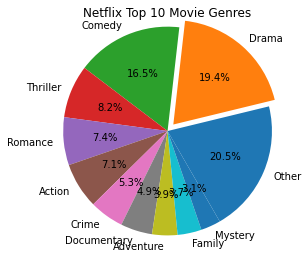

In [19]:
#plot pie chart for movie genres
plt.pie(movie_genres_counts, explode = [0, .10 ,0, 0, 0, 0, 0, 0, 0, 0, 0], labels = movie_genres, autopct = "%1.1f%%", startangle = 300, radius = 1.2)   
plt.title('Netflix Top 10 Movie Genres')

### Country

In [20]:
#Analysis for country
list_of_countries = []
for country in cleaned_movie_netflix_df['Country']:
    if ',' not in country:
        list_of_countries.append(country.strip())
    elif ',' in country:
        countries = country.split(',')
        countries = [countrie.strip() for countrie in countries]
        for countri in countries:
            list_of_countries.append(countri)

countries_count = collections.Counter(list_of_countries)
countries_count = pd.DataFrame(countries_count, index = [0])
len(countries_count.keys())

# country_counts = cleaned_movie_netflix_df['Country'].value_counts()
# country_counts
# country_bar.plot(kind = 'bar', color = 'navy')

97

### Language

In [21]:
# #Analysis for language
# language_counts = cleaned_movie_netflix_df['Language'].value_counts()
list_of_languages = []
for language in cleaned_movie_netflix_df['Language']:
    if ',' not in language:
        list_of_languages.append(language.strip())
    elif ',' in language:
        languages = language.split(',')
        languages = [langue.strip() for langue in languages]
        for languag in languages:
            list_of_languages.append(languag)
            
languages_count = collections.Counter(list_of_languages)
language_df = pd.DataFrame(languages_count, index = [0])
language_df.value_counts()
len(language_df.keys())

113

## Medium: TV Show

### Genre

In [22]:
#Analysis for Genre
tv_list_of_genres = []
for genre in cleaned_tv_show_netflix_df['Genre']:
    if pd.isnull(genre):
        pass
    elif ',' not in genre:
        tv_list_of_genres.append(genre.strip())
    elif ',' in genre:
        genres = genre.split(',')
        genres = [genre.strip() for genre in genres]
        for genre in genres:
            tv_list_of_genres.append(genre)
            
tv_genres_count = collections.Counter(tv_list_of_genres)
tv_genres_count = dict(tv_genres_count)
tv_genres_count = pd.DataFrame(tv_genres_count, index = ['Count'])
tv_genres_count = tv_genres_count.T
tv_genres_count.sort_values('Count', ascending = False, inplace = True)
tv_top_10_genres = tv_genres_count.head(10).index
tv_top_10_genres

for index, genre in enumerate(tv_list_of_genres):
    if genre not in tv_top_10_genres:
        tv_list_of_genres[index] = 'Other'

tv_list_of_genres
tv_genres_count = collections.Counter(tv_list_of_genres)
tv_genres_count = dict(tv_genres_count)
tv_genres_count = pd.DataFrame(tv_genres_count, index = ['Count'])
tv_genres_count = tv_genres_count.T
tv_genres_count.sort_values('Count', ascending = False, inplace = True)

tv_genres_counts = []
tv_genres = []
for key, count in tv_genres_count.iterrows():
    tv_genres_counts.append(count[0])
    tv_genres.append(key)

Text(0.5, 1.0, 'Netflix Top 10 TV Genres')

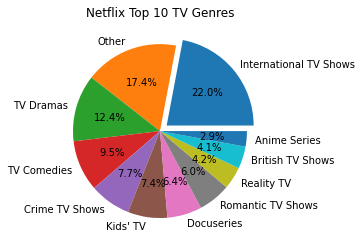

In [23]:
#plot pie chart for tv genres
plt.pie(tv_genres_counts, explode = [.10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], labels = tv_genres, autopct = "%1.1f%%")
plt.title('Netflix Top 10 TV Genres')

### Country

In [24]:
#Analysis for country
list_of_countries = []
for country in cleaned_tv_show_netflix_df['Country']:
    if pd.isnull(country):
        pass
    elif ',' not in country:
        list_of_countries.append(country.strip())
    elif ',' in country:
        countries = country.split(',')
        countries = [countrie.strip() for countrie in countries]
        for countri in countries:
            list_of_countries.append(countri)

countries_count = collections.Counter(list_of_countries)
countries_count = pd.DataFrame(countries_count, index = [0])
len(countries_count.keys())

# country_counts = cleaned_tv_show_netflix_df['Country'].value_counts()
# country_counts
# country_bar.plot(kind = 'bar', color = 'navy')

66

### Language(?)

In [25]:
# #Analysis for language
# language_counts = cleaned_tv_show_netflix_df['Language'].value_counts()
# list_of_languages = []
# for language in cleaned_tv_show_netflix_df['Language']:
#     if pd.isnull(language):
#         pass
#     if ',' not in language:
#         list_of_languages.append(language.strip())
#     elif ',' in language:
#         languages = language.split(',')
#         languages = [langue.strip() for langue in languages]
#         for languag in languages:
#             list_of_languages.append(languag)
            
# languages_count = collections.Counter(list_of_languages)
# language_df = pd.DataFrame(languages_count, index = [0])
# language_df.value_counts()
# len(language_df.keys())

### Combined Date Added

In [26]:
#Clean up date_added column
cleaned_movie_netflix_df['Date Added']

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

movie_months_added = []
for index, date in enumerate(cleaned_movie_netflix_df['Date Added']):
    if pd.isnull(cleaned_movie_netflix_df['Date Added'][index]):
        pass
    elif ',' in date:
        date_string = date.split(',')
        month = date_string[0].split(' ')[0]
        movie_months_added.append(month)
        
movie_months_added_collec = collections.Counter(movie_months_added)

movie_count = []
for month in months:
    movie_count.append(movie_months_added_collec.get(month))

#cleaned_tv_show_netflix_df['Date Added']
tv_months_added = []
for index, date in enumerate(cleaned_tv_show_netflix_df['Date Added']):
    if pd.isnull(cleaned_tv_show_netflix_df['Date Added'][index]):
        pass
    elif ',' in date:
        date_string = date.split(',')
        month = date_string[0].split(' ')[0]
        tv_months_added.append(month)
        
tv_months_added_collec = collections.Counter(tv_months_added)

tv_count = []
for month in months:
    tv_count.append(tv_months_added_collec.get(month))
tv_months_added_collec

Counter({'August': 230,
         'July': 254,
         'February': 175,
         'June': 232,
         'May': 187,
         'October': 210,
         'September': 246,
         'December': 250,
         'March': 205,
         'November': 199,
         'January': 181,
         'April': 209,
         '': 88})

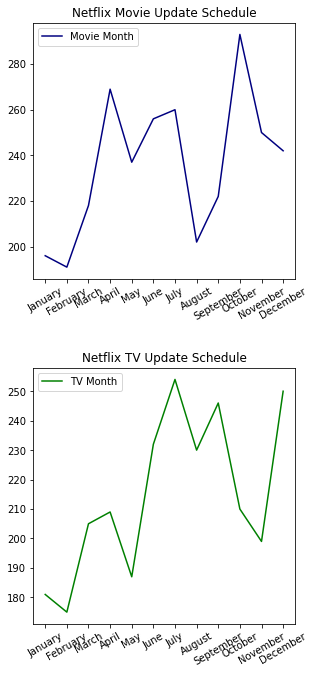

In [27]:
#plot line charts
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (5, 10))
ax1.plot(months, movie_count, color = 'navy', label = 'Movie Month')
ax2.plot(months, tv_count, color = 'green', label = 'TV Month')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=30)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=30)
ax1.set_title('Netflix Movie Update Schedule')
ax2.set_title('Netflix TV Update Schedule')
ax1.legend(loc = 'best')
ax2.legend(loc = 'upper left')
fig.tight_layout(pad = 3)

### Combined Release Year

In [28]:
#Analysis for release year (Movie)
movie_release_year_counts = cleaned_movie_netflix_df['Year'].value_counts(ascending = True)
cleaned_movie_netflix_df['Year'] = cleaned_movie_netflix_df['Year'].astype(int)
movie_earliest_year = cleaned_movie_netflix_df['Year'].min()
movie_latest_year = cleaned_movie_netflix_df['Year'].max()

#Analysis for release year (TV Show)

tv_release_year_counts = cleaned_tv_show_netflix_df['Year'].value_counts(ascending = True)
cleaned_tv_show_netflix_df['Year'] = cleaned_tv_show_netflix_df['Year'].astype(int)
tv_earliest_year = cleaned_tv_show_netflix_df['Year'].min()
tv_latest_year = cleaned_tv_show_netflix_df['Year'].max()

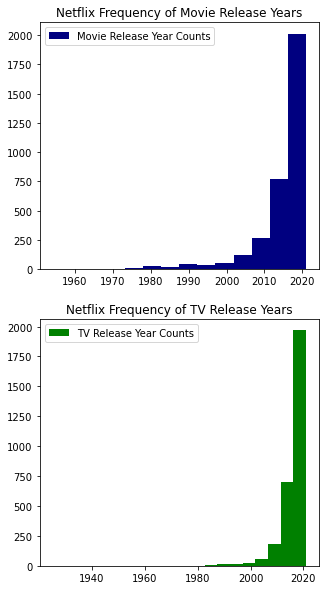

In [29]:
#plot histograms
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (5, 10))
ax1.hist(cleaned_movie_netflix_df['Year'], bins = (movie_latest_year - movie_earliest_year)//5 + 1, color = 'navy', label = 'Movie Release Year Counts')
ax2.hist(cleaned_tv_show_netflix_df['Year'], bins = (tv_latest_year - tv_earliest_year)//5 + 1, color = 'green', label = 'TV Release Year Counts')
ax1.set_title('Netflix Frequency of Movie Release Years')
ax2.set_title('Netflix Frequency of TV Release Years')
ax1.legend(loc='best')
ax2.legend(loc='best')

### Combined Advisory Rating

In [30]:
#Analysis for advisory rating

advisory_rating_movie = cleaned_movie_netflix_df['Advisory Rating'].copy()
advisory_rating_movie.rename('Movie Counts for Advisory Rating', inplace = True)

advisory_rating_movie_counts = advisory_rating_movie.value_counts()
top_5_ratings_movie = advisory_rating_movie_counts.head(5).keys()

for index, rating in enumerate(advisory_rating_movie):
    if rating not in top_5_ratings_movie:
        advisory_rating_movie.loc[index] = 'Other'

advisory_rating_movie_counts = advisory_rating_movie.value_counts()
# advisory_rating_movie_counts.plot(kind = 'bar', color = 'navy')

#Analysis for advisory rating (TV Show)
advisory_rating_tv = cleaned_tv_show_netflix_df['Advisory Rating'].copy()
advisory_rating_tv.rename('TV Show Counts for Advisory Rating', inplace = True)
advisory_rating_tv_counts = advisory_rating_tv.value_counts()
top_5_ratings_tv = advisory_rating_tv_counts.head(5).keys()
print(top_5_ratings_tv)

for index, rating in enumerate(advisory_rating_tv):
    if rating not in top_5_ratings_tv:
        advisory_rating_tv.loc[index] = 'Other'

advisory_rating_tv_counts = advisory_rating_tv.value_counts()
# advisory_rating_tv_counts.plot(kind = 'bar', color = 'green')

Index(['TV-MA', 'TV-14', 'TV-PG', 'TV-Y7', 'TV-Y'], dtype='object')


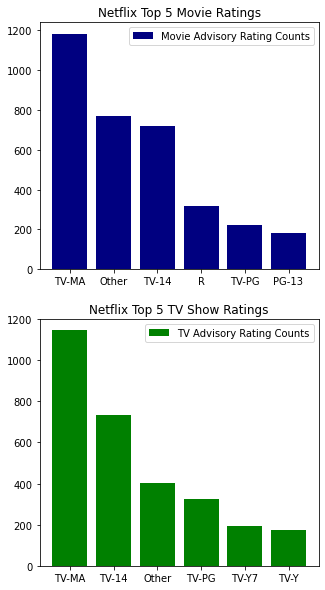

In [31]:
#plot barplots
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (5, 10))
ax1.bar(advisory_rating_movie_counts.keys(), advisory_rating_movie_counts, color = 'navy', label = 'Movie Advisory Rating Counts')
ax2.bar(advisory_rating_tv_counts.keys(), advisory_rating_tv_counts, color = 'green', label = 'TV Advisory Rating Counts')
ax1.set_title('Netflix Top 5 Movie Ratings')
ax2.set_title('Netflix Top 5 TV Show Ratings')
ax1.legend(loc='best')
ax2.legend(loc='best')

### Combined Advisory Rating

In [32]:
cleaned_movie_netflix_df['IMDB Rating']
movie_imdb_ratings = []
for c_rating in cleaned_movie_netflix_df['IMDB Rating']:
    rating = float(c_rating.split('/')[0])
    movie_imdb_ratings.append(rating)
    
movie_imdb_ratings

cleaned_movie_netflix_df['Rotten Tomatoes Rating']
movie_rotten_tomato_ratings = []
for c_rating in cleaned_movie_netflix_df['Rotten Tomatoes Rating']:
    rating = float(c_rating.split('/')[0])
    movie_rotten_tomato_ratings.append(rating)
    
movie_rotten_tomato_ratings = [float(rating)/10 for rating in movie_rotten_tomato_ratings]
movie_rotten_tomato_ratings

movie_ratings_data = [movie_imdb_ratings, movie_rotten_tomato_ratings]

#TV Show
cleaned_tv_show_netflix_df['IMDB Rating']
tv_imdb_ratings = []
for c_rating in cleaned_tv_show_netflix_df['IMDB Rating']:
    if pd.isnull(c_rating):
        pass
    else:
        rating = float(c_rating.split('/')[0])
        tv_imdb_ratings.append(rating)

cleaned_tv_show_netflix_df['Rotten Tomatoes Rating']
tv_rotten_tomato_ratings = []
for c_rating in cleaned_tv_show_netflix_df['Rotten Tomatoes Rating']:
    if pd.isnull(c_rating):
        pass
    else:
        rating = float(c_rating.split('/')[0])
        tv_rotten_tomato_ratings.append(rating)
    
tv_rotten_tomato_ratings = [float(rating)/10 for rating in tv_rotten_tomato_ratings]

tv_ratings_data = [tv_imdb_ratings, tv_rotten_tomato_ratings]

Text(0.5, 1.0, 'Netflix TV Show Ratings')

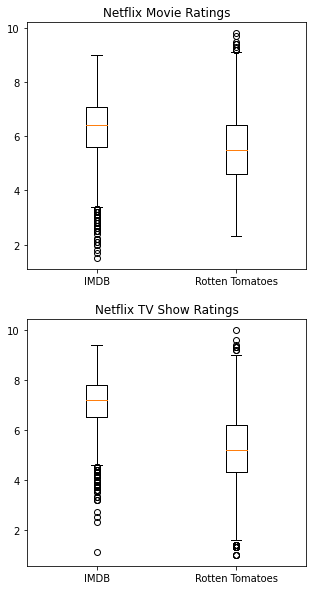

In [33]:
#plot boxplots
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (5, 10))
ax1.boxplot(movie_ratings_data)
ax2.boxplot(tv_ratings_data)
#adjust x-axis
critics = ['IMDB', 'Rotten Tomatoes']
x_axis = [x for x in range(len(movie_ratings_data))]
tick_locations = [value+1 for value in x_axis]
ax1.set_xticklabels(critics)
ax2.set_xticklabels(critics)
plt.title('TV Shows on Netflix Critical Reception')
ax1.set_title('Netflix Movie Ratings')
ax2.set_title('Netflix TV Show Ratings')